In [ ]:
#Import Libraries
import sys
import os
import pandas as pd
from datetime import datetime

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from scripts.data_loader import DataLoader


In [ ]:
# Loads a dataset from a text file and saves it as a CSV file.
dataLoader = DataLoader()
df = dataLoader.load_csv('../data/cleaned/CleanedMachineLearningRating_v3.csv')

e:\KAIM\week3\insurance-risk-analytics-week3\scripts\data_loader.py:32: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_path)


Loaded data from ../data/cleaned/CleanedMachineLearningRating_v3.csv


In [46]:
df

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Bank,AccountType,MaritalStatus,...,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,Not specified,Close Corporation,Mr,First National Bank,Current account,Not specified,...,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,21.929825,0.0
1,145249,12827,2015-05-01,True,Not specified,Close Corporation,Mr,First National Bank,Current account,Not specified,...,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,21.929825,0.0
2,145249,12827,2015-07-01,True,Not specified,Close Corporation,Mr,First National Bank,Current account,Not specified,...,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,0.000000,0.0
3,145255,12827,2015-05-01,True,Not specified,Close Corporation,Mr,First National Bank,Current account,Not specified,...,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,512.848070,0.0
4,145255,12827,2015-07-01,True,Not specified,Close Corporation,Mr,First National Bank,Current account,Not specified,...,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01,False,ZW,Individual,Mr,ABSA Bank,Savings account,Single,...,Monthly,395.8481,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,347.235175,0.0
1000094,31520,389,2015-06-01,False,ZW,Individual,Mr,ABSA Bank,Savings account,Single,...,Monthly,395.8481,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,347.235175,0.0
1000095,31520,389,2015-08-01,False,ZW,Individual,Mr,ABSA Bank,Savings account,Single,...,Monthly,395.8481,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,347.235175,0.0
1000096,31519,389,2014-07-01,False,ZW,Individual,Mr,ABSA Bank,Savings account,Single,...,Monthly,2.6391,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,2.315000,0.0


In [47]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Bank',
       'AccountType', 'MaritalStatus', 'Gender', 'Province', 'PostalCode',
       'MainCrestaZone', 'SubCrestaZone', 'mmcode', 'VehicleType',
       'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity',
       'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate',
       'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice',
       'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt',
       'Converted', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'TotalPremium', 'TotalClaims'],
      dtype='object')

In [48]:
numerical_columns = ['Cylinders', 'cubiccapacity', 'kilowatts',  'NumberOfDoors',
                     'CustomValueEstimate', 'CapitalOutstanding', 'SumInsured', 'CalculatedPremiumPerTerm', 
                     'TotalPremium', 'TotalClaims']

In [49]:
categorical_columns = ['Citizenship', 'LegalType', 'Title', 'AccountType', 'MaritalStatus', 
                       'Gender', 'Province',  'VehicleType', ]

In [50]:
dates = ['TransactionMonth', 'RegistrationYear', 'VehicleIntroDate']

In [51]:
high_cardinality_cols = ['UnderwrittenCoverID', 'PolicyID', 'Bank', 'PostalCode', 'mmcode', 'make', 'Model', 
                         'MainCrestaZone', 'SubCrestaZone', 'bodytype', 'ExcessSelected',
                         'CoverCategory', 'CoverType', 'CoverGroup']

In [52]:
binary_columns = ['AlarmImmobiliser', 'TrackingDevice', 'WrittenOff', 'Rebuilt', 'Converted']

In [53]:
cols_552 = [
    'mmcode', 'Cylinders',
    'cubiccapacity', 'kilowatts', 'NumberOfDoors', 
]

# Check if the same rows are missing
missing_together = df[cols_552].isnull().all(axis=1)
print("Number of rows with all 552-value columns missing:", missing_together.sum())

# Drop if there is any missing value
df = df.dropna(subset=cols_552)

Number of rows with all 552-value columns missing: 552


In [65]:
df = df.dropna()

In [54]:
df.fillna({'CustomValueEstimate': df['CustomValueEstimate'].median()}, inplace=True)


C:\Users\Martha.Ketsela\AppData\Local\Temp\ipykernel_12160\113384604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({'CustomValueEstimate': df['CustomValueEstimate'].median()}, inplace=True)


In [55]:
# First convert all to string (to safely apply str.replace)
df['CapitalOutstanding'] = df['CapitalOutstanding'].astype(str)

# Replace comma with dot
df['CapitalOutstanding'] = df['CapitalOutstanding'].str.replace(',', '.')

# Convert to numeric, coercing errors to NaN
df['CapitalOutstanding'] = pd.to_numeric(df['CapitalOutstanding'], errors='coerce')

df.fillna({'CapitalOutstanding': df['CapitalOutstanding'].median()}, inplace=True)


C:\Users\Martha.Ketsela\AppData\Local\Temp\ipykernel_12160\240820103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CapitalOutstanding'] = df['CapitalOutstanding'].astype(str)
C:\Users\Martha.Ketsela\AppData\Local\Temp\ipykernel_12160\240820103.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CapitalOutstanding'] = df['CapitalOutstanding'].str.replace(',', '.')
C:\Users\Martha.Ketsela\AppData\Local\Temp\ipykernel_12160\240820103.py:8: SettingWithCopyWarning: 
A value is trying to be set on a

In [56]:
df['IsVATRegistered'] = df['IsVATRegistered'].astype(int)

C:\Users\Martha.Ketsela\AppData\Local\Temp\ipykernel_12160\1139637782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsVATRegistered'] = df['IsVATRegistered'].astype(int)


In [57]:
df['NewVehicle'] = df['NewVehicle'].map({'Less than 6 months': 1, 'More than 6 months': 0})
df['NewVehicle'] = df['NewVehicle'].fillna(0)
df['NewVehicle'] = df['NewVehicle'].astype(int)

C:\Users\Martha.Ketsela\AppData\Local\Temp\ipykernel_12160\3224198726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NewVehicle'] = df['NewVehicle'].map({'Less than 6 months': 1, 'More than 6 months': 0})
C:\Users\Martha.Ketsela\AppData\Local\Temp\ipykernel_12160\3224198726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NewVehicle'] = df['NewVehicle'].fillna(0)
C:\Users\Martha.Ketsela\AppData\Local\Temp\ipykernel_12160\3224198726.py:3: SettingWithCopyWarning: 
A value is trying to be set o

In [58]:
for bin_col in binary_columns:
    df[bin_col] = df[bin_col].map({'Yes': 1, 'No': 0})
    df[bin_col] = df[bin_col].fillna(0)
    df[bin_col] = df[bin_col].astype(int)


C:\Users\Martha.Ketsela\AppData\Local\Temp\ipykernel_12160\1762220180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bin_col] = df[bin_col].map({'Yes': 1, 'No': 0})
C:\Users\Martha.Ketsela\AppData\Local\Temp\ipykernel_12160\1762220180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bin_col] = df[bin_col].fillna(0)
C:\Users\Martha.Ketsela\AppData\Local\Temp\ipykernel_12160\1762220180.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [59]:
from sklearn.preprocessing import OneHotEncoder

# Assume categorical_columns is a list of your categorical column names
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid dummy variable trap

# Fit and transform the categorical columns
encoded = encoder.fit_transform(df[categorical_columns])

# Get new column names
encoded_cols = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded, columns=encoded_cols)

# Concatenate with the original DataFrame (drop original categorical columns if needed)
df = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

In [60]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['TermFrequency'] = le.fit_transform(df['TermFrequency'].astype(str))

In [61]:
df

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Bank,PostalCode,MainCrestaZone,SubCrestaZone,mmcode,RegistrationYear,...,Province_KwaZulu-Natal,Province_Limpopo,Province_Mpumalanga,Province_North West,Province_Northern Cape,Province_Western Cape,VehicleType_Heavy Commercial,VehicleType_Light Commercial,VehicleType_Medium Commercial,VehicleType_Passenger Vehicle
0,145249.0,12827.0,2015-03-01,1.0,First National Bank,1459.0,Rand East,Rand East,44069150.0,2004-01-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,145249.0,12827.0,2015-05-01,1.0,First National Bank,1459.0,Rand East,Rand East,44069150.0,2004-01-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,145249.0,12827.0,2015-07-01,1.0,First National Bank,1459.0,Rand East,Rand East,44069150.0,2004-01-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,145255.0,12827.0,2015-05-01,1.0,First National Bank,1459.0,Rand East,Rand East,44069150.0,2004-01-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,145255.0,12827.0,2015-07-01,1.0,First National Bank,1459.0,Rand East,Rand East,44069150.0,2004-01-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
936562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
936563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
936564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [66]:
df.isnull().sum()

UnderwrittenCoverID              0
PolicyID                         0
TransactionMonth                 0
IsVATRegistered                  0
Bank                             0
                                ..
VehicleType_Heavy Commercial     0
VehicleType_Light Commercial     0
VehicleType_Medium Commercial    0
VehicleType_Passenger Vehicle    0
TransactionYear                  0
Length: 69, dtype: int64

In [67]:
# Train-Test Split
# Define features (X) and target variables (y)
# Ensure all non-numeric columns after encoding are dropped or handled
import numpy as np
from sklearn.model_selection import train_test_split

X = df.drop(columns=['TotalPremium', 'TotalClaims'], errors='ignore') # Drop target variables and the helper 'HasClaim'
y_premium = df['TotalPremium']
y_claims = df['TotalClaims']

# Drop any remaining non-numeric columns that weren't encoded
X = X.select_dtypes(include=np.number)


X_train, X_test, y_premium_train, y_premium_test, y_claims_train, y_claims_test = train_test_split(
    X, y_premium, y_claims, test_size=0.3, random_state=42) # 70:30 split

print("\nData Preprocessing Complete.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_premium_train:", y_premium_train.shape)
print("Shape of y_premium_test:", y_premium_test.shape)
print("Shape of y_claims_train:", y_claims_train.shape)
print("Shape of y_claims_test:", y_claims_test.shape)


Data Preprocessing Complete.
Shape of X_train: (699295, 53)
Shape of X_test: (299699, 53)
Shape of y_premium_train: (699295,)
Shape of y_premium_test: (299699,)
Shape of y_claims_train: (699295,)
Shape of y_claims_test: (299699,)


Linear Regression - RMSE: 32044.00, R2: 0.288
Random Forest - RMSE: 33370.91, R2: 0.227
XGBoost - RMSE: 36146.22, R2: 0.094


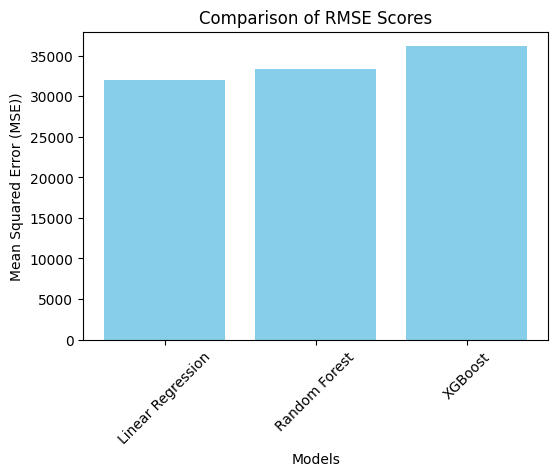

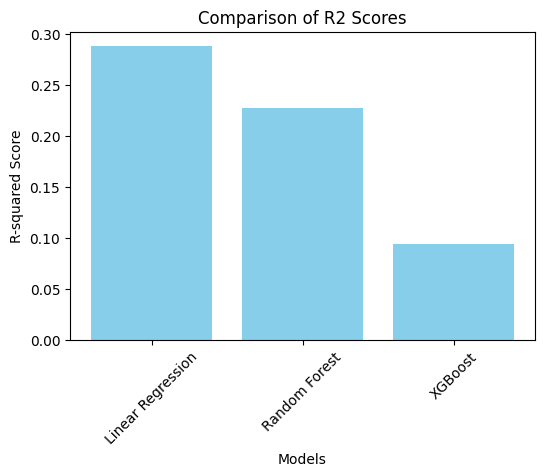

In [68]:
# --- Claim Severity Prediction (Risk Model) ---
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df['TransactionDate'] = pd.to_datetime(df['TransactionMonth'])
df['TransactionYear'] = df['TransactionDate'].dt.year
df['TransactionMonth'] = df['TransactionDate'].dt.month
# Then drop the original date column
df = df.drop(columns=['TransactionDate'])

# Subset data: only policies with claims > 0
claim_df = df[df['TotalClaims'] > 0].copy()

# Features (drop target and any leakage columns)
features = [col for col in claim_df.columns if col not in ['TotalClaims', 'CalculatedPremiumPerTerm']]
X = claim_df[features]
X = X.select_dtypes(exclude=['object'])
y = claim_df['TotalClaims']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb = XGBRegressor(random_state=42, verbosity=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

models = ['Linear Regression', 'Random Forest', 'XGBoost']
rmse_scores, r2_scores = [], []

# Evaluation
for name, y_pred in zip(['Linear Regression', 'Random Forest', 'XGBoost'], [y_pred_lr, y_pred_rf, y_pred_xgb]):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - RMSE: {rmse:.2f}, R2: {r2:.3f}")
    rmse_scores.append(rmse)
    r2_scores.append(r2)

plt.figure(figsize=(6, 4))
plt.bar(models, rmse_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE))')
plt.title('Comparison of RMSE Scores')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(models, r2_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of R2 Scores')
plt.xticks(rotation=45)
plt.show()




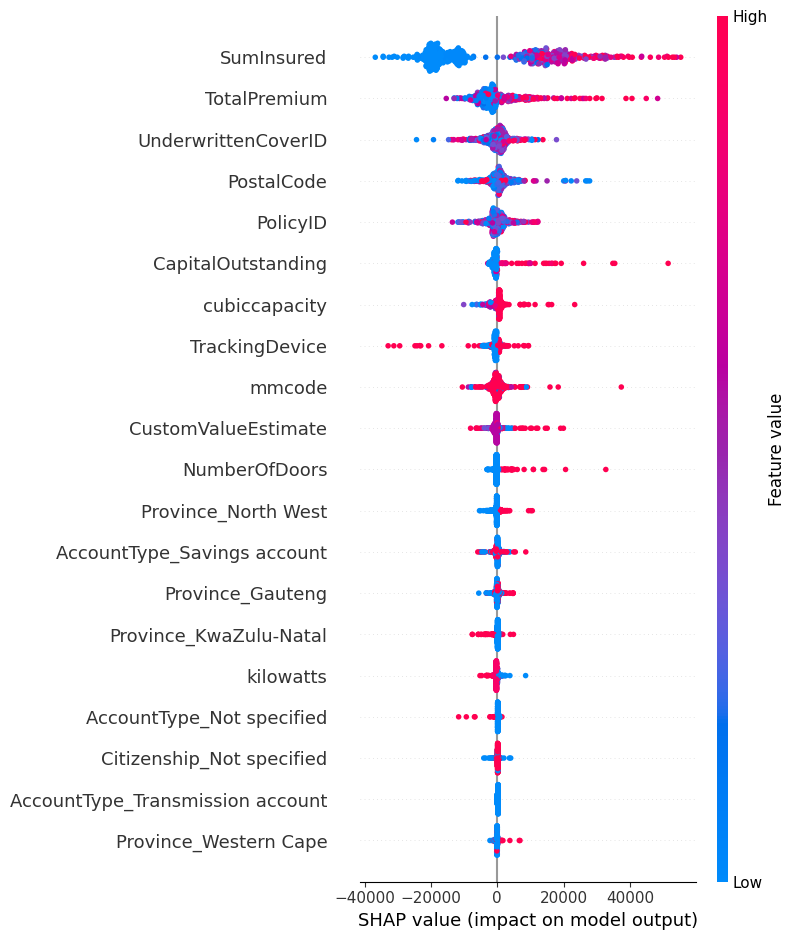

In [ ]:
# --- Model Interpretation with SHAP ---
import shap

# Create a SHAP explainer for the XGBoost model
explainer = shap.Explainer(xgb, X_train)
shap_values = explainer(X_test)

# Summary plot (feature importance)
shap.summary_plot(shap_values, X_test)

# Force plot for a single prediction 
shap.initjs()
shap.force_plot(shap_values[0])



LIME Explanation for instance 0:


e:\KAIM\week3\insurance-risk-analytics-week3\.venv\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
e:\KAIM\week3\insurance-risk-analytics-week3\.venv\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
e:\KAIM\week3\insurance-risk-analytics-week3\.venv\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated a

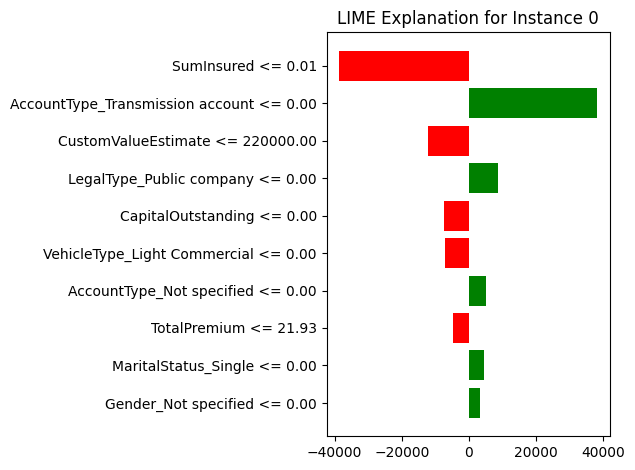

In [ ]:
# --- Model Interpretation with LIME ---
from lime.lime_tabular import LimeTabularExplainer

# Create a LIME explainer for tabular data
lime_explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['TotalClaims'],
    mode='regression'
)

# Explain a single prediction 
instance_index = 0 # index of the sample to explain
lime_exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[instance_index],
    predict_fn=xgb.predict
)

print(f"\nLIME Explanation for instance {instance_index}:")
# Show the explanation as a plot
fig = lime_exp.as_pyplot_figure()
plt.title(f"LIME Explanation for Instance {instance_index}")
plt.tight_layout()
plt.show()


Linear Regression (Premium) - RMSE: 148.21, R2: 0.554
Random Forest (Premium) - RMSE: 18.07, R2: 0.993
XGBoost (Premium) - RMSE: 43.95, R2: 0.961


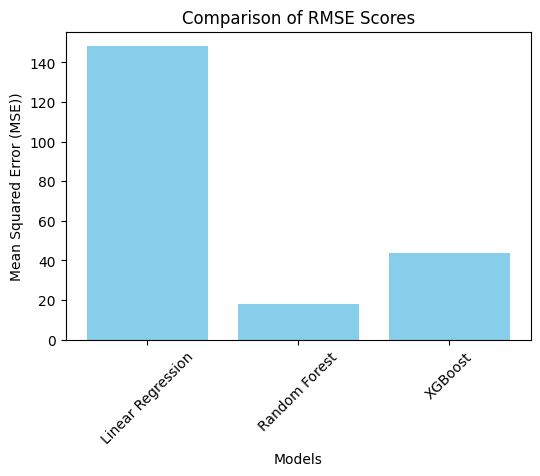

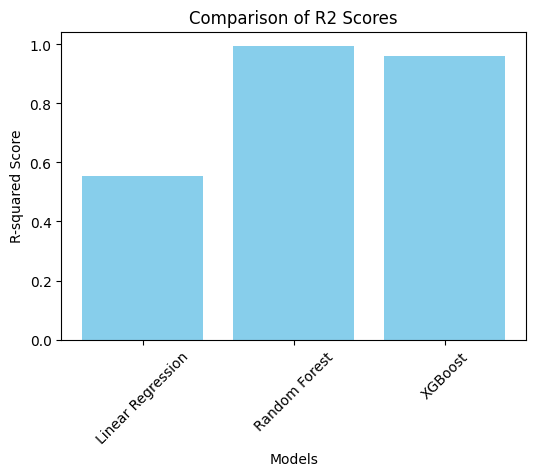

In [77]:
# --- Premium Optimization (Pricing Framework) ---
# Target: CalculatedPremiumPerTerm
premium_df = df.copy()
features_premium = [col for col in premium_df.columns if col not in ['CalculatedPremiumPerTerm', 'TotalClaims']]
X_p = premium_df[features_premium]
y_p = premium_df['CalculatedPremiumPerTerm']


# Drop any remaining non-numeric columns that weren't encoded
X_p = X_p.select_dtypes(include=np.number)


X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.2, random_state=42)


# Linear Regression
lr_p = LinearRegression()
lr_p.fit(X_train_p, y_train_p)
y_pred_lr_p = lr_p.predict(X_test_p)


# Random Forest
rf_p = RandomForestRegressor(random_state=42)
rf_p.fit(X_train_p, y_train_p)
y_pred_rf_p = rf_p.predict(X_test_p)


# XGBoost
xgb_p = XGBRegressor(random_state=42, verbosity=0)
xgb_p.fit(X_train_p, y_train_p)
y_pred_xgb_p = xgb_p.predict(X_test_p)

models = ['Linear Regression', 'Random Forest', 'XGBoost']
rmse_scores, r2_scores = [], []

# Evaluation
for name, y_pred in zip(['Linear Regression', 'Random Forest', 'XGBoost'], [y_pred_lr_p, y_pred_rf_p, y_pred_xgb_p]):
    rmse = np.sqrt(mean_squared_error(y_test_p, y_pred))
    r2 = r2_score(y_test_p, y_pred)
    print(f"{name} (Premium) - RMSE: {rmse:.2f}, R2: {r2:.3f}")
    rmse_scores.append(rmse)
    r2_scores.append(r2)

plt.figure(figsize=(6, 4))
plt.bar(models, rmse_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE))')
plt.title('Comparison of RMSE Scores')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(models, r2_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of R2 Scores')
plt.xticks(rotation=45)
plt.show()

100%|===================| 199360/199799 [06:34<00:00]        

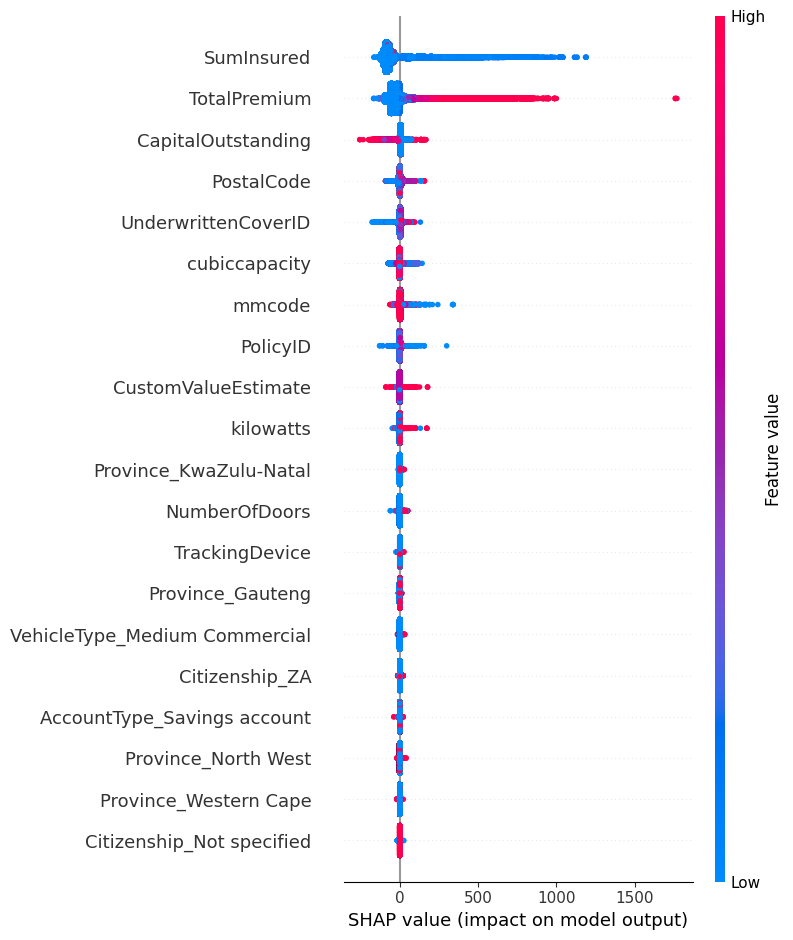

In [78]:
# --- Model Interpretation with SHAP ---
import shap

# Create a SHAP explainer for the XGBoost model
explainer_p = shap.Explainer(xgb_p, X_train_p)
shap_values_p = explainer_p(X_test_p)

# Summary plot (feature importance)
shap.summary_plot(shap_values_p, X_test_p)

# Force plot for a single prediction
shap.initjs()
shap.force_plot(shap_values_p[0])


e:\KAIM\week3\insurance-risk-analytics-week3\.venv\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
e:\KAIM\week3\insurance-risk-analytics-week3\.venv\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
e:\KAIM\week3\insurance-risk-analytics-week3\.venv\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated a


LIME Explanation for instance 0:


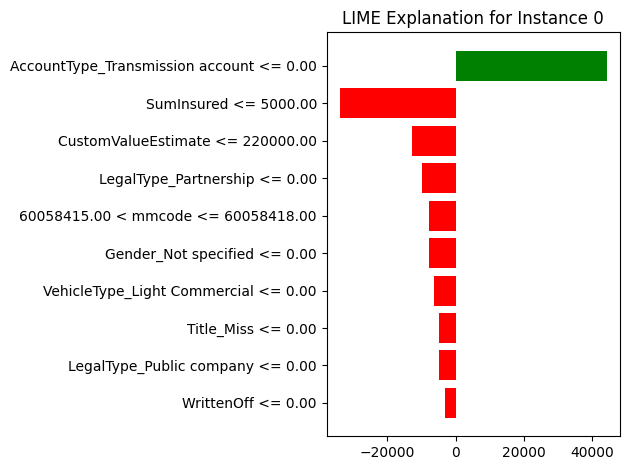

In [79]:
# --- Model Interpretation with LIME ---
from lime.lime_tabular import LimeTabularExplainer

# Create a LIME explainer for tabular data
lime_explainer = LimeTabularExplainer(
    training_data=np.array(X_train_p),
    feature_names=X_train_p.columns,
    class_names=['TotalClaims'],
    mode='regression'
)

# Explain a single prediction 
instance_index = 0 # index of the sample to explain
lime_exp_p = lime_explainer.explain_instance(
    data_row=X_test.iloc[instance_index],
    predict_fn=xgb.predict
)

print(f"\nLIME Explanation for instance {instance_index}:")
# Show the explanation as a plot
fig = lime_exp_p.as_pyplot_figure()
plt.title(f"LIME Explanation for Instance {instance_index}")
plt.tight_layout()
plt.show()